<a href="https://colab.research.google.com/github/sarasame00/laboElectro/blob/main/4.Transformadors/transformadors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import funclab as fl
import sympy as sym

colors = ['g', 'y', 'c', 'b', 'm', 'r', '#ff870c', '#ffd645']

#Estudi de les variables d'un transformador

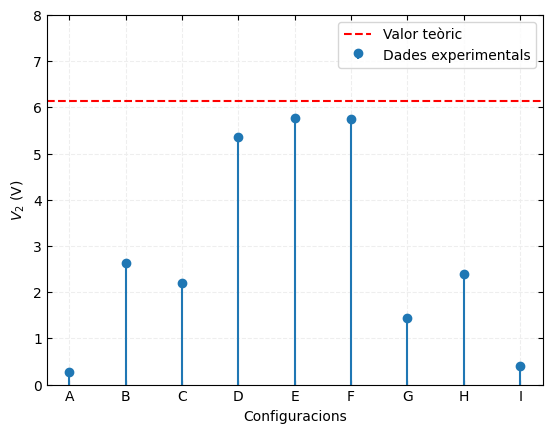

In [3]:
# voltatges de sortida per a diferents configuracions
V2 = np.array([0.268, # A
      2.63, # B
      2.19, # C
      5.35, # D
      5.78, # E
      5.75, # F
      1.44 , # G
      2.40, # H
      0.40  # I
      ])
conf = ['A', 'B', 'C', 'D','E', 'F', 'G', 'H', 'I']

ks = V2/6.14

fig = plt.figure()
ax = fig.add_subplot()

ax.tick_params(direction = 'in', right = True, top = True)
ax.grid(color = '#eeeeee', linestyle = '--')

plt.axhline(y=6.14, color='r', linestyle='--',label = 'Valor teòric')
plt.stem(conf, V2, basefmt=" ",label= 'Dades experimentals')
plt.xlabel('Configuracions')
plt.ylabel('$V_2$ (V)')
plt.ylim(0, 8)
plt.legend(loc='upper right')


In [4]:
#constants d'acoblament
vV2 = fl.Variable('V2', V2, [0.001, 0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
vV1 = fl.Variable('V1', 6.14, 0.01)

k_sim = vV2.sim/vV1.sim

ks, iks = fl.propIncertesa(k_sim, [vV2,vV1])
for i in range(len(ks)):
  print(f'${ks[i]} \pm {iks[i]}$')

$0.0436482084690554 \pm 0.000177704881708910$
$0.428338762214984 \pm 0.00177178494430574$
$0.356677524429967 \pm 0.00172916227278675$
$0.871335504885994 \pm 0.00216019219340704$
$0.941368078175896 \pm 0.00223677597611147$
$0.936482084690554 \pm 0.00223132902211712$
$0.234527687296417 \pm 0.00167285587055459$
$0.390879478827362 \pm 0.00174866299684787$
$0.0651465798045603 \pm 0.00163211692454682$


In [5]:
Ventrada = 6.14
iVentrada = 0.01
pr200 = [[400, 800, 1600, 3200], # voltes secundari
         [Ventrada*4/2, Ventrada*8/2, Ventrada*16/2, Ventrada*32/2], # valor teoric
         [iVentrada*4/2, iVentrada*8/2, iVentrada*16/2, iVentrada*32/2], # incertesa valor teoric
         [11.77, 23.2, 46.6, 93.5], # valor experimental
         [0.01, 0.1, 0.1, 0.1]] # incertesa experimental

pr400 = [[200, 400, 800, 1600, 3200], # voltes secundari
         [Ventrada*2/4, Ventrada*4/4, Ventrada*8/4, Ventrada*16/4, Ventrada*32/4], # valor teoric
         [iVentrada*2/4, iVentrada*4/4, iVentrada*8/4, iVentrada*16/4, iVentrada*32/4], # incertesa valor teoric
         [2.86, 5.74, 11.51, 22.8, 46.0] , # valor experimental
         [0.01, 0.01, 0.01, 0.01, 0.1]] # incertesa experimental

pr800 = [[200, 400, 1600, 3200], # voltes secundari
         [Ventrada*2/8, Ventrada*4/8, Ventrada*16/8, Ventrada*32/8], # valor teoric
         [iVentrada*2/8, iVentrada*4/8, iVentrada*16/8, iVentrada*32/8], # incertesa valor teoric
         [1.436, 2.88, 11.54, 23.0] , # valor experimental
         [0.001, 0.01, 0.01, 0.1]] # incertesa experimental

pr1600 = [[200, 400, 800, 3200], # voltes secundari
         [Ventrada*2/16, Ventrada*4/16, Ventrada*8/16, Ventrada*32/16], # valor teoric
         [iVentrada*2/16, iVentrada*4/16, iVentrada*8/16, iVentrada*32/16], # incertesa valor teoric
         [0.712, 1.434, 2.83, 11.46]  , # valor experimental
         [0.001, 0.001, 0.01, 0.01]] # incertesa experimental

pr3200 = [[200, 400, 800, 1600], # voltes secundari
         [Ventrada*2/32, Ventrada*4/32, Ventrada*8/32, Ventrada*16/32], # valor teoric
         [iVentrada*2/32, iVentrada*4/32, iVentrada*8/32, iVentrada*16/32], # incertesa valor teoric
         [0.349, 0.708, 1.409, 2.80]   , # valor experimental
         [0.001, 0.001, 0.001, 0.01]] # incertesa experimental


In [6]:
voltes200 = fl.Variable('voltes200', pr200[0], 0)
voltes400 = fl.Variable('voltes400', pr400[0], 0)
voltes800 = fl.Variable('voltes800', pr800[0], 0)
voltes1600 = fl.Variable('voltes1600', pr1600[0], 0)
voltes3200 = fl.Variable('voltes3200', pr3200[0], 0)

ex200 = fl.Variable('ex200', pr200[3], pr200[4])
ex400 = fl.Variable('ex400', pr400[3], pr400[4])
ex800 = fl.Variable('ex800', pr800[3], pr800[4])
ex1600 = fl.Variable('ex1600', pr1600[3], pr1600[4])
ex3200 = fl.Variable('ex3200', pr3200[3], pr3200[4])

teo200 = fl.Variable('teo200', pr200[1], pr200[2])
teo400 = fl.Variable('teo400', pr400[1], pr400[2])
teo800 = fl.Variable('teo800', pr800[1], pr800[2])
teo1600 = fl.Variable('teo1600', pr1600[1], pr1600[2])
teo3200 = fl.Variable('teo3200', pr3200[1], pr3200[2])

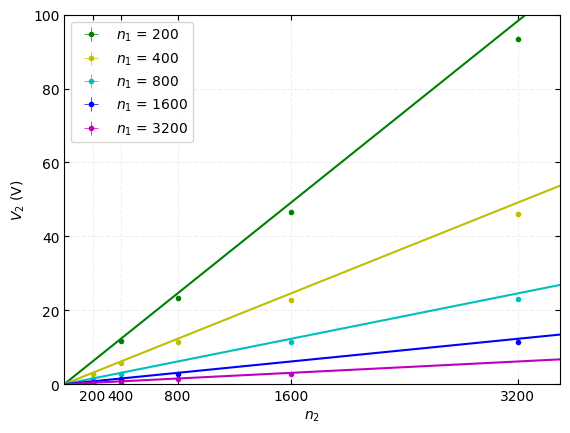

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

n2 = np.arange(0,3500,1)
fl.plotDades(ax, voltes200, ex200, color=colors[0], label='$n_1$ = 200')
fl.plotDades(ax, voltes400, ex400, color=colors[1], label='$n_1$ = 400')
fl.plotDades(ax, voltes800, ex800, color=colors[2], label='$n_1$ = 800')
fl.plotDades(ax, voltes1600, ex1600, color=colors[3], label='$n_1$ = 1600')
fl.plotDades(ax, voltes3200, ex3200, color=colors[4], label='$n_1$ = 3200')
plt.plot(n2, n2*6.14/200,color=colors[0])
plt.plot(n2, n2*6.14/400,color=colors[1])
plt.plot(n2, n2*6.14/800,color=colors[2])
plt.plot(n2, n2*6.14/1600,color=colors[3])
plt.plot(n2, n2*6.14/3200,color=colors[4])

plt.xlabel('$n_2$')
plt.ylabel('$V_2$ (V)')
plt.xlim(0, 3500)
plt.ylim(0,100)
plt.xticks(ticks=[200,400, 800,1600, 3200])
plt.legend(loc='upper left')

#Estudi intensitats i voltatges d'entrada i de sortida


##Reactàncies de les bobines


### Bobina de 400 voltes

In [8]:
V1 = fl.Variable('V1', 6.14, 0.01)
I1 = fl.Variable('I1', 0.060, 0.001)

X_sim = V1.sim/I1.sim

X, iX = fl.propIncertesa(X_sim, [V1, I1])

print(f'(${X} \pm {iX}) \Omega$')

($102.333333333333 \pm 1.71367952980252) \Omega$


In [9]:
V1 = fl.Variable('V1', 6.14, 0.01)
I1 = fl.Variable('I1', 0.029, 0.001)

X_sim = V1.sim/I1.sim

X, iX = fl.propIncertesa(X_sim, [V1, I1])

print(f'(${X} \pm {iX}) \Omega$')

($211.724137931034 \pm 7.30897112846708) \Omega$


##Valors teòrics


In [10]:


Z1000 = fl.Variable('Z1000', 1000, 1)
Z100 = fl.Variable('Z100', 100, 1)
Z10 = fl.Variable('Z10', 10, 1)

alpha = fl.Variable('alpha', fl.importData('transformadors','1000', 4, delHead=True),0)
k = fl.Variable('k', fl.importData('transformadors', '1000', 2, delHead=True),fl.importData('transformadors', '1000', 3, delHead=True))
V1 = fl.Variable('V1', 6.14, 0.01)
X = fl.Variable('X', fl.importData('transformadors', '1000', 5, delHead=True),fl.importData('transformadors', '1000', 6, delHead=True))


############  VALORS TEORICS  ############

# el voltatge de sortida no depen de la impedancia de carrega
V2_sim = k.sim*alpha.sim
V2, iV2 = fl.propIncertesa(V2_sim, [k, alpha])

V2_teo = fl.Variable('V2_teo', V2, iV2)

#Z=1000
I1_1000_sim = V1.sim/(X.sim*sym.sqrt(2))
I2_1000_sim = k.sim*alpha.sim*V1.sim/(Z1000.sim*sym.sqrt(2))
V2_1000_sim = k.sim*alpha.sim

I1_1000, iI1_1000 = fl.propIncertesa(I1_1000_sim, [V1, X])
I2_1000, iI2_1000 = fl.propIncertesa(I2_1000_sim, [V1, k, alpha, Z1000])
V2_1000, iV2_1000 = fl.propIncertesa(V2_sim, [k, alpha])

#Z=100
I1_100_sim = sym.sqrt(1/X.sim**2 + alpha.sim**4/Z100.sim**2)*V1.sim/sym.sqrt(2)
I2_100_sim = k.sim*alpha.sim*V1.sim/(Z100.sim*sym.sqrt(2))
V2_100_sim = k.sim*alpha.sim

I1_100, iI1_100 = fl.propIncertesa(I1_100_sim, [V1, X, alpha, Z100])
I2_100, iI2_100 = fl.propIncertesa(I2_100_sim, [V1, k, alpha, Z100])
V2_100, iV2_100 = fl.propIncertesa(V2_sim, [k, alpha])

#Z=10
I1_10_sim = (alpha.sim**2*V1.sim)/(sym.sqrt(Z10.sim**2+X.sim**2*alpha.sim**4*(k.sim**2-1)**2)*sym.sqrt(2))
I2_10_sim = (k.sim*alpha.sim*V1.sim)/(sym.sqrt(Z10.sim**2+X.sim**2*alpha.sim**4*(k.sim**2-1)**2)*sym.sqrt(2))
V2_10_sim = (k.sim*alpha.sim*Z10.sim)/(sym.sqrt(Z10.sim**2+X.sim**2*alpha.sim**4*(k.sim**2-1)**2)*sym.sqrt(2))

I1_10, iI1_10 = fl.propIncertesa(I1_10_sim, [V1, X, alpha, Z10, k])
I2_10, iI2_10 = fl.propIncertesa(I2_10_sim, [V1, X, alpha, Z10, k])
V2_10, iV2_10 = fl.propIncertesa(V2_10_sim, [X, alpha, Z10, k])



############  VALORS EXPERIMENTALS  ############

I1_10_exp = fl.Variable('I1_10_exp', fl.importData('transformadors','10',8,delHead=True),0.01)
I2_10_exp = fl.Variable('I2_10_exp', fl.importData('transformadors','10',10,delHead=True),0.01)
V2_10_exp = fl.Variable('V2_10_exp', fl.importData('transformadors','10',9,delHead=True),0.01)

I1_100_exp = fl.Variable('I1_100_exp', fl.importData('transformadors','100',8,delHead=True),0.01)
I2_100_exp = fl.Variable('I2_100_exp', fl.importData('transformadors','100',10,delHead=True),0.01)
V2_100_exp = fl.Variable('V2_100_exp', fl.importData('transformadors','100',9,delHead=True),0.01)

I1_1000_exp = fl.Variable('I1_1000_exp', fl.importData('transformadors','1000',8,delHead=True),0.01)
I2_1000_exp = fl.Variable('I2_1000_exp', fl.importData('transformadors','1000',10,delHead=True),0.01)
V2_1000_exp = fl.Variable('V2_1000_exp', fl.importData('transformadors','1000',9,delHead=True),0.01)

In [11]:
for i in range(len(V2_10)):
  #print(f'${V2_teo.val[i].evalf()} \pm {V2_teo.inc[i].evalf()}$')
  print(f'${V2_10[i].evalf()} \pm {iV2_10[i].evalf()}$')



$0.434553636283789 \pm 0.0272215520750281$
$0.280391276035553 \pm 0.0290918393426287$
$0.285138431361027 \pm 0.00832963828272462$
$0.124756490114017 \pm 0.0127241279587913$
$0.0181727113452855 \pm 0.00184400300786807$
$0.00151543194245427 \pm 0.000153669046704002$


In [12]:
alpha_E = fl.Variable('alpha_I1', alpha.val[0:3], 0)

I1_10_alpha = fl.Variable('I1_10_alpha', I1_10[0:3], iI1_10[0:3])
I1_10_exp_alpha = fl.Variable('I1_10_exp_alpha', I1_10_exp.val[0:3], I1_10_exp.inc)

I1_100_alpha = fl.Variable('I1_100_alpha', I1_100[0:3], iI1_100[0:3])
I1_100_exp_alpha = fl.Variable('I1_100_exp_alpha', I1_100_exp.val[0:3], I1_100_exp.inc)

I1_1000_alpha = fl.Variable('I1_1000_alpha', I1_1000[0:3], iI1_1000[0:3])
I1_1000_exp_alpha = fl.Variable('I1_1000_exp_alpha', I1_1000_exp.val[0:3], I1_1000_exp.inc)

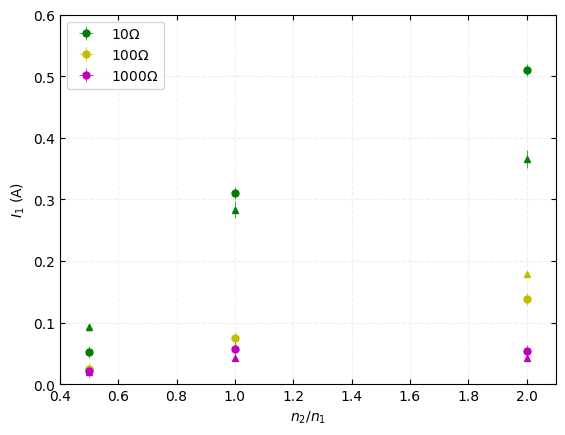

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

fl.plotDades(ax, alpha_E, I1_10_exp_alpha, color='g', markersize =5, label = '$10 \Omega$')
fl.plotDades(ax, alpha_E, I1_10_alpha, color='g', marker='^', markersize =5)

fl.plotDades(ax, alpha_E, I1_100_exp_alpha, color='y', markersize =5,label = '$100 \Omega$')
fl.plotDades(ax, alpha_E, I1_100_alpha, color='y', marker='^', markersize =5)

fl.plotDades(ax, alpha_E, I1_1000_exp_alpha, color='m', markersize =5,label = '$1000 \Omega$')
fl.plotDades(ax, alpha_E, I1_1000_alpha, color='m', marker='^', markersize =5)

plt.xlabel('$ n_2/n_1$')
plt.ylabel('$I_1$ (A)')
plt.xlim(0.4, 2.1)
plt.ylim(0,0.6)


plt.legend()

In [14]:
I2_10_alpha = fl.Variable('I2_10_alpha', I2_10[0:3], iI2_10[0:3])
I2_10_exp_alpha = fl.Variable('I2_10_exp_alpha', I2_10_exp.val[0:3], I2_10_exp.inc)

I2_100_alpha = fl.Variable('I2_100_alpha', I2_100[0:3], iI2_100[0:3])
I2_100_exp_alpha = fl.Variable('I2_100_exp_alpha', I2_100_exp.val[0:3], I2_100_exp.inc)

I2_1000_alpha = fl.Variable('I2_1000_alpha', I2_1000[0:3], iI2_1000[0:3])
I2_1000_exp_alpha = fl.Variable('I2_1000_exp_alpha', I2_1000_exp.val[0:3], I2_1000_exp.inc)

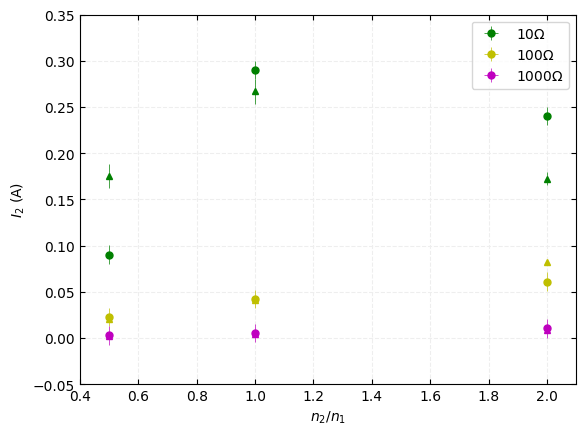

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

fl.plotDades(ax, alpha_E, I2_10_exp_alpha, color='g', markersize =5, label = '$10 \Omega$')
fl.plotDades(ax, alpha_E, I2_10_alpha, color='g', marker='^', markersize =5)

fl.plotDades(ax, alpha_E, I2_100_exp_alpha, color='y', markersize =5, label = '$100 \Omega$')
fl.plotDades(ax, alpha_E, I2_100_alpha, color='y', marker='^', markersize =5)

fl.plotDades(ax, alpha_E, I2_1000_exp_alpha, color='m', markersize =5, label = '$1000 \Omega$')
fl.plotDades(ax, alpha_E, I2_1000_alpha, color='m', marker='^', markersize =5)

plt.xlabel('$ n_2/n_1$')
plt.ylabel('$I_2$ (A)')
plt.xlim(0.4, 2.1)
plt.ylim(-0.05,0.35)

plt.legend()

In [16]:
kval = k.val[1:6]
kinc = k.inc[1:6]

I1_10_kval = I1_10[1:6]
I1_10_kinc = iI1_10[1:6]

I1_100_kval = I1_100[1:6]
I1_100_kinc = iI1_100[1:6]

I1_1000_kval = I1_1000[1:6]
I1_1000_kinc = iI1_1000[1:6]

I1_10_k_expval = I1_10_exp.val[1:6]

I1_100_k_expval = I1_100_exp.val[1:6]

I1_1000_k_expval = I1_1000_exp.val[1:6]

for i in [kval, kinc,
          I1_10_kval, I1_10_kinc,
          I1_100_kval, I1_100_kinc,
          I1_1000_kval, I1_1000_kinc,
          I1_10_k_expval,
          I1_100_k_expval,
          I1_1000_k_expval,]:
          i.pop(1)

k_ = fl.Variable('alpha_I1', kval, kinc)

I1_10_k = fl.Variable('I1_10_alpha', I1_10_kval, I1_10_kinc)
I1_10_exp_k = fl.Variable('I1_10_exp_alpha', I1_10_k_expval, 0.1)

I1_100_k = fl.Variable('I1_100_alpha', I1_100_kval, I1_100_kinc)
I1_100_exp_k = fl.Variable('I1_100_exp_alpha', I1_100_k_expval, 0.1)

I1_1000_k = fl.Variable('I1_1000_alpha', I1_1000_kval, I1_1000_kinc)
I1_1000_exp_k = fl.Variable('I1_1000_exp_alpha', I1_1000_k_expval, 0.1)


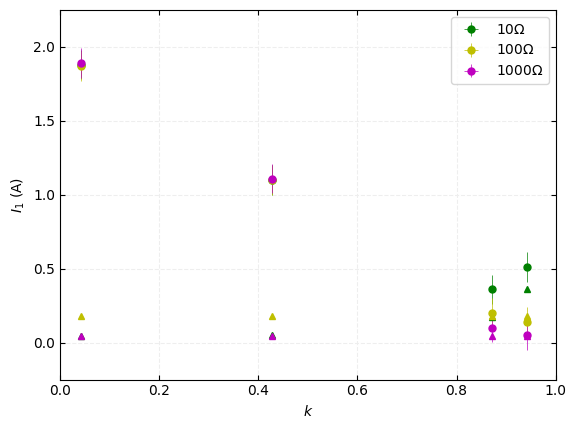

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

fl.plotDades(ax, k_, I1_10_exp_k, color='g', markersize =5, label = '$10 \Omega$')
fl.plotDades(ax, k_, I1_10_k, color='g', marker='^', markersize =5)

fl.plotDades(ax, k_, I1_100_exp_k, color='y', markersize =5, label = '$100 \Omega$')
fl.plotDades(ax, k_, I1_100_k, color='y', marker='^', markersize =5)

fl.plotDades(ax, k_, I1_1000_exp_k, color='m', markersize =5, label = '$1000 \Omega$')
fl.plotDades(ax, k_, I1_1000_k, color='m', marker='^', markersize =5)

plt.xlabel('$k$')
plt.ylabel('$I_1$ (A)')
plt.xlim(0, 1)
plt.ylim(-0.25, 2.25)

plt.legend()

In [18]:
I2_10_kval = I2_10[1:6]
I2_10_kinc = iI2_10[1:6]

I2_100_kval = I2_100[1:6]
I2_100_kinc = iI2_100[1:6]

I2_1000_kval = I2_1000[1:6]
I2_1000_kinc = iI2_1000[1:6]

I2_10_k_expval = I2_10_exp.val[1:6]

I2_100_k_expval = I2_100_exp.val[1:6]

I2_1000_k_expval = I2_1000_exp.val[1:6]

for i in [I2_10_kval, I2_10_kinc,
          I2_100_kval, I2_100_kinc,
          I2_1000_kval, I2_1000_kinc,
          I2_10_k_expval,
          I2_100_k_expval,
          I2_1000_k_expval,]:
          i.pop(1)


I2_10_k = fl.Variable('I1_10_alpha', I2_10_kval, I2_10_kinc)
I2_10_exp_k = fl.Variable('I1_10_exp_alpha', I2_10_k_expval, 0.01)

I2_100_k = fl.Variable('I1_100_alpha', I2_100_kval, I2_100_kinc)
I2_100_exp_k = fl.Variable('I1_100_exp_alpha', I2_100_k_expval, 0.001)

I2_1000_k = fl.Variable('I1_1000_alpha', I2_1000_kval, I2_1000_kinc)
I2_1000_exp_k = fl.Variable('I1_1000_exp_alpha', I2_1000_k_expval, [0.001, 0.001,0.01,0.001])


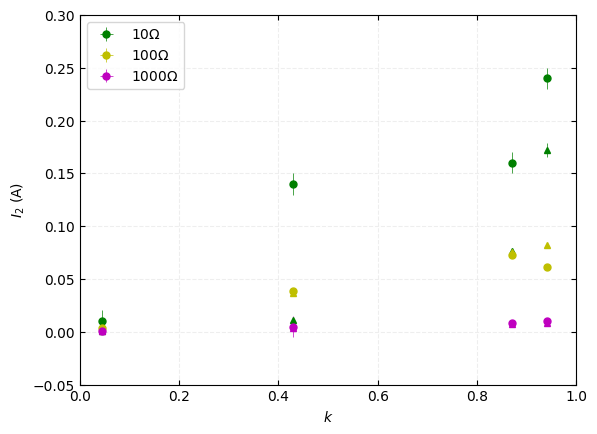

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

fl.plotDades(ax, k_, I2_10_exp_k, color='g', markersize =5, label = '$10 \Omega$')
fl.plotDades(ax, k_, I2_10_k, color='g', marker='^', markersize =5)

fl.plotDades(ax, k_, I2_100_exp_k, color='y', markersize =5, label = '$100 \Omega$')
fl.plotDades(ax, k_, I2_100_k, color='y', marker='^', markersize =5)

fl.plotDades(ax, k_, I2_1000_exp_k, color='m', markersize =5, label = '$1000 \Omega$')
fl.plotDades(ax, k_, I2_1000_k, color='m', marker='^', markersize =5)

plt.xlabel('$k$')
plt.ylabel('$I_2$ (A)')
plt.xlim(0, 1)
plt.ylim(-0.05, 0.30)

plt.legend()